# **Problem 5: Image Denoising Using Spatial Filters**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# A.

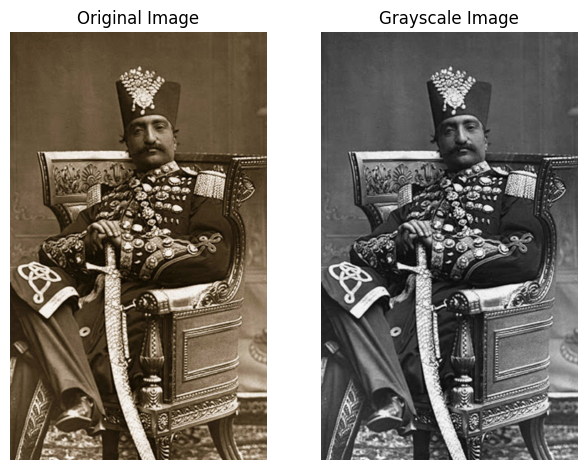

In [25]:
image = cv2.imread('q5.jpg')

# Convert images to RGB and Grayscale
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap = 'gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout() 
plt.show()

• Gaussian noise

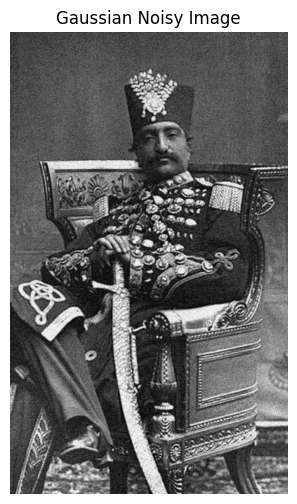

In [11]:
# Generate Gaussian noise and add it to the image
def gaussian_noise(image, mean=0, var=0.01):
    std_dev  = var ** 0.5  
    gaussian = np.random.normal(mean, std_dev , image.shape)  # Generate noise
    noisy_image = np.clip(image / 255.0 + gaussian, 0, 1) * 255  
    return noisy_image.astype(np.uint8)

# Apply Gaussian noise
gaussian_noise_image = gaussian_noise(image, mean=0, var=0.01)

plt.figure(figsize=(10, 6))
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.axis('off')
plt.show()

• Salt & pepper noise

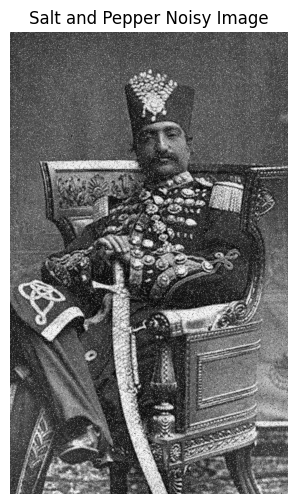

In [19]:
# Generate salt & pepper noise and add it to the image
def salt_and_pepper_noise(image, prob=0.05):
    noisy_image = np.copy(image)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            random_value = random.random()
            if random_value < prob:
                noisy_image[i][j] = 0  # pepper noise
            elif random_value > 1 - prob:
                noisy_image[i][j] = 255  # salt noise
            else:
                noisy_image[i][j] = image[i][j]
    return noisy_image

# Apply salt & pepper noise
salt_pepper_noise_image = salt_and_pepper_noise(image)

plt.figure(figsize=(10, 6))
plt.imshow(salt_pepper_noise_image, cmap='gray')
plt.title('Salt and Pepper Noisy Image')
plt.axis('off')
plt.show()

# B.

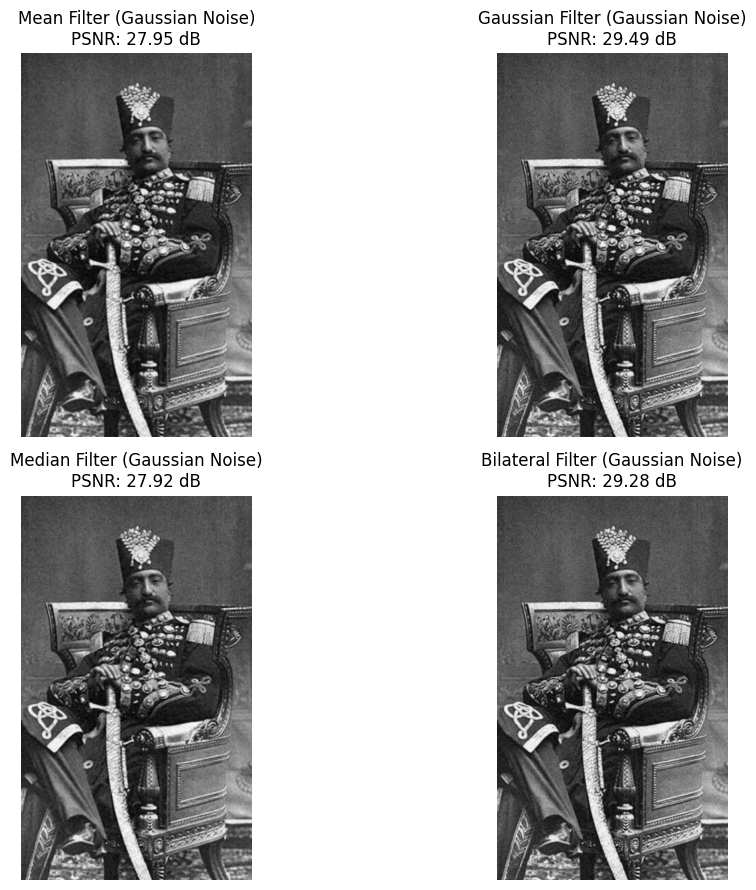

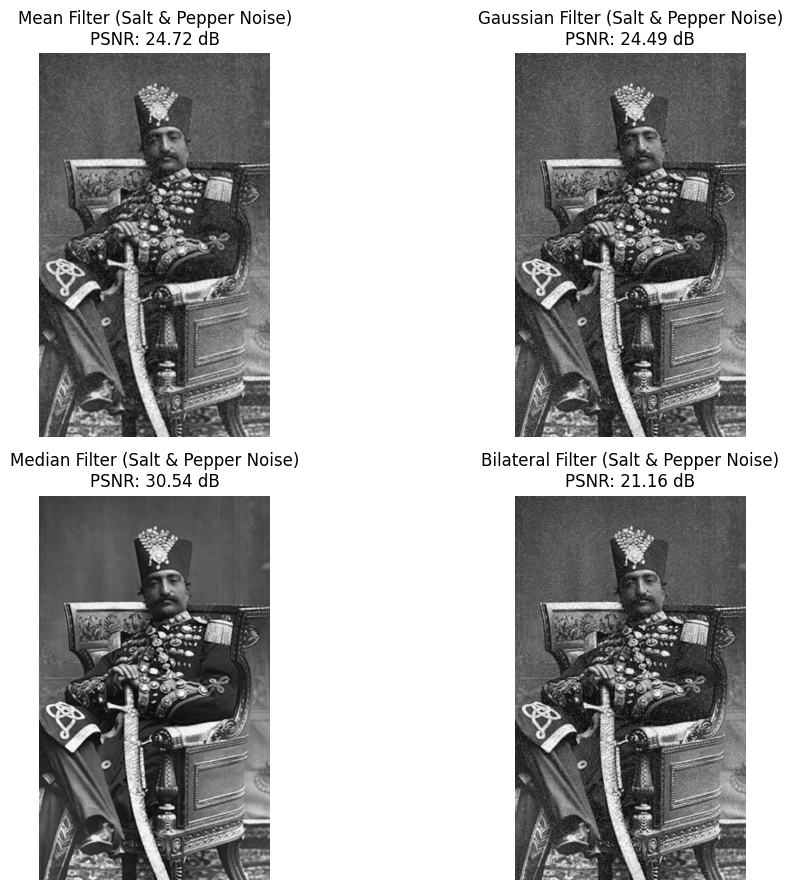

In [20]:
# Defining different spatial filters
def spatial_filters(noisy_image, k):
    return {
        'Mean': cv2.blur(noisy_image, (k, k)),
        'Gaussian': cv2.GaussianBlur(noisy_image, (k, k), 0),
        'Median': cv2.medianBlur(noisy_image, k),
        'Bilateral': cv2.bilateralFilter(noisy_image, k, 100, 100)
    }

# calculate PSNR
def psnr(original, filtered):
    return cv2.PSNR(original, filtered)

def display_filtered_fonc(original, filtered, noise_type):
    plt.figure(figsize=(12, 9))
    for i, (filter_name, filtered_image) in enumerate(filtered.items(), 1):
        plt.subplot(2, 2, i)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f"{filter_name} Filter ({noise_type} Noise)\nPSNR: {psnr(original, filtered_image):.2f} dB")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Apply spatial filters to noisy images
filtered_gaussian = spatial_filters(gaussian_noise_image, 5)
filtered_salt_pepper = spatial_filters(salt_pepper_noise_image, 5)

display_filtered_fonc(image, filtered_gaussian, 'Gaussian')
display_filtered_fonc(image, filtered_salt_pepper, 'Salt & Pepper')

# C.

Reducing Gaussian noise with spatial filters:


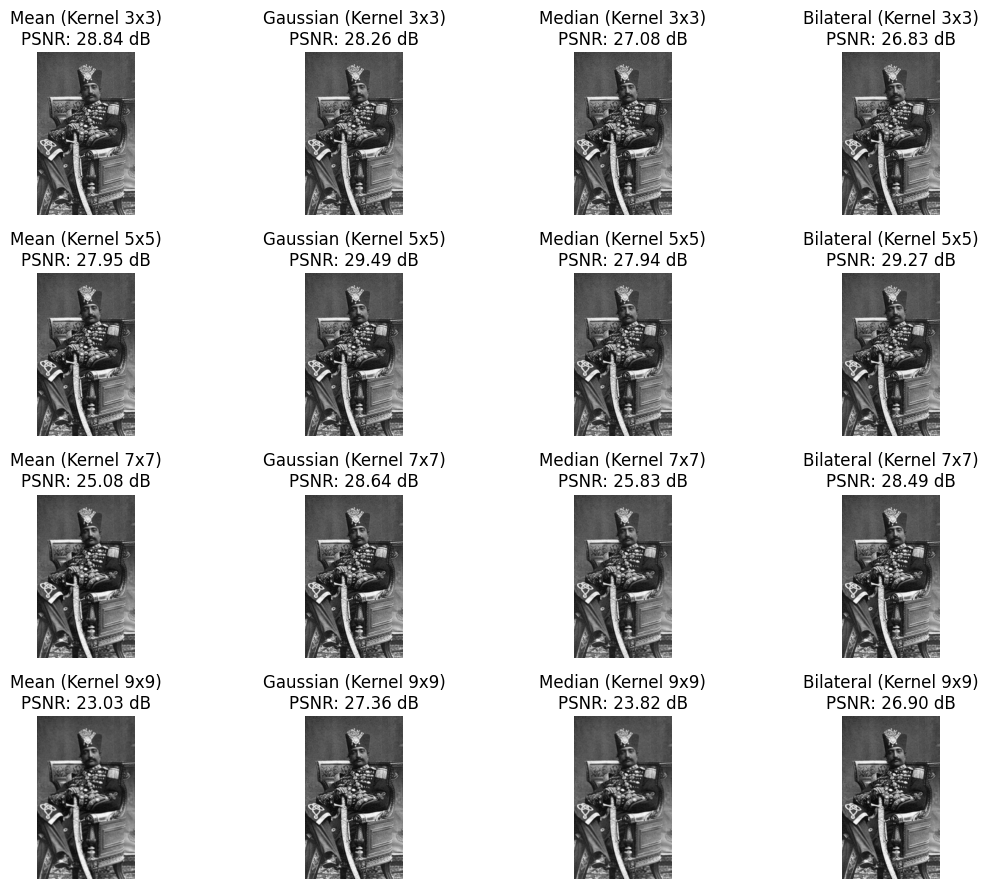

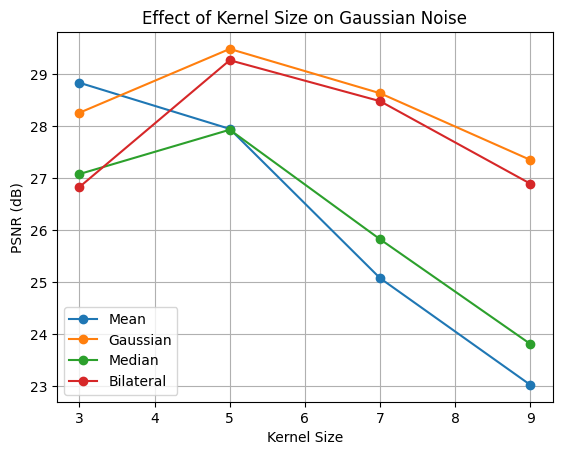

Reducing Salt & Pepper noise with spatial filters:


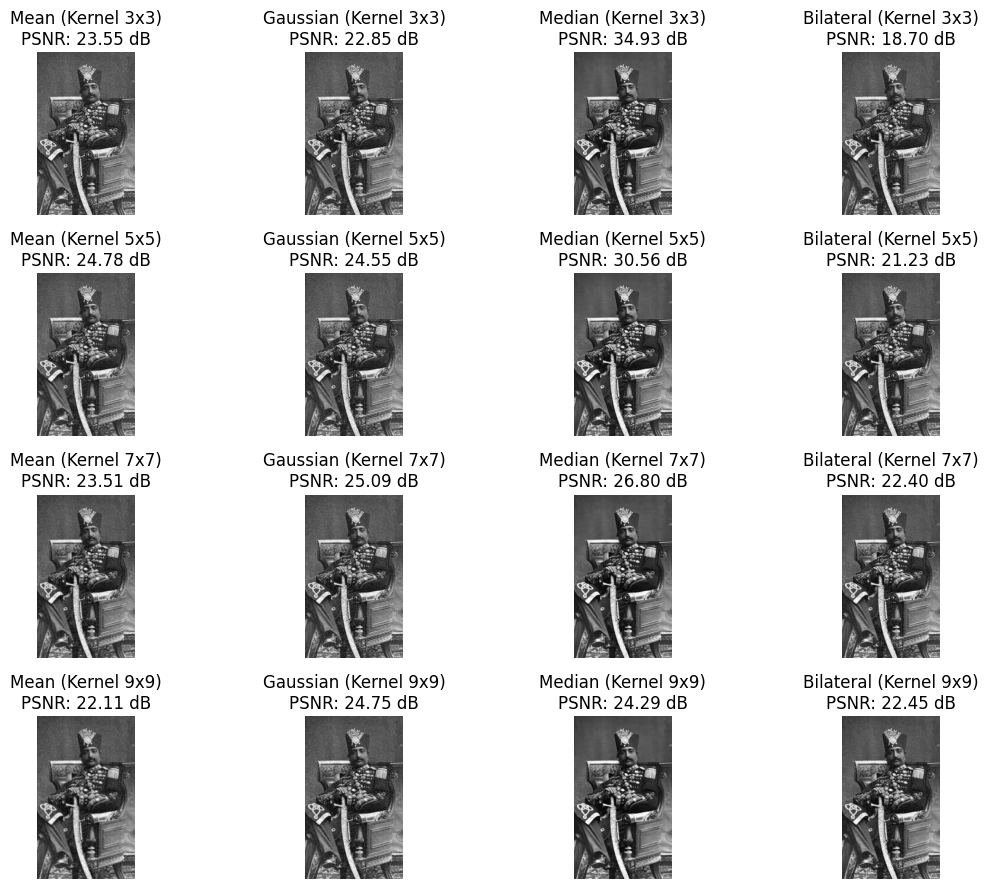

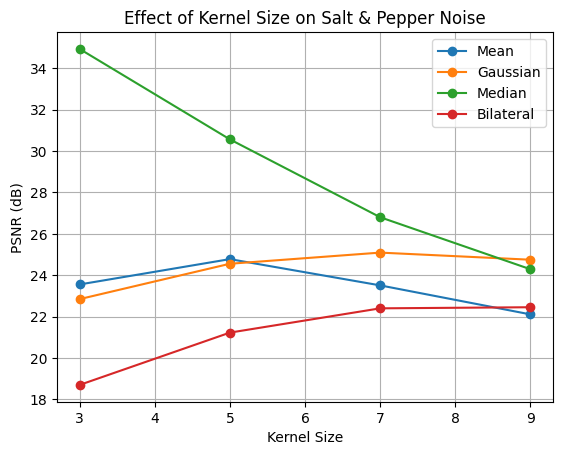

In [6]:
kernel_sizes = [3, 5, 7, 9]   # Define kernel sizes

# Apply spatial filters to a noisy image and evaluate PSNR
def filter_and_evaluate(noisy_image, noise_type):
    psnr_per_filter = {'Mean': [], 'Gaussian': [], 'Median': [], 'Bilateral': []}
    plt.figure(figsize=(12, 9))
     
    # Applying filters with varying kernel sizes
    for i, k in enumerate(kernel_sizes):
        filtered_images = spatial_filters(noisy_image, k)

        for j, (filter_name, filtered_image) in enumerate(filtered_images.items()):
            psnr_per_filter[filter_name].append(psnr(image, filtered_image))

            plt.subplot(len(kernel_sizes), 4, i * 4 + j + 1)
            plt.imshow(filtered_image, cmap='gray')
            plt.title(f"{filter_name} (Kernel {k}x{k})\nPSNR: {psnr(image, filtered_image):.2f} dB")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Comparing the effect of different kernel sizes on PSNR
    for name, values in psnr_per_filter.items():
        plt.plot(kernel_sizes, values, marker='o', label=name)

    plt.xlabel('Kernel Size')
    plt.ylabel('PSNR (dB)')
    plt.title(f"Effect of Kernel Size on {noise_type} Noise")
    plt.legend()
    plt.grid()
    plt.show()


print('Reducing Gaussian noise with spatial filters:')
filter_and_evaluate(gaussian_noise_image, 'Gaussian')

print('Reducing Salt & Pepper noise with spatial filters:')
filter_and_evaluate(salt_pepper_noise_image, 'Salt & Pepper')

# D.

"Explanation of this part in the report."

# E.

"Explanation of this part in the report."

# F.

"Explanation of this part in the report."

# G.

"Explanation of this part in the report."